In [1]:
%connect_info

{
  "shell_port": 41993,
  "iopub_port": 59051,
  "stdin_port": 41551,
  "control_port": 59823,
  "hb_port": 56159,
  "ip": "127.0.0.1",
  "key": "23a39f4d-906c8187017c4c98299c4730",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-03ab8c69-9be6-4123-81c3-477ba5eb2ecb.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


<ipython-input-4-0c2403d703b1>:46: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  for ax,df,c in zip(pd.np.hstack([axs[:2],axs[3:-1]]), dfs, ('C0', 'C1')*2):


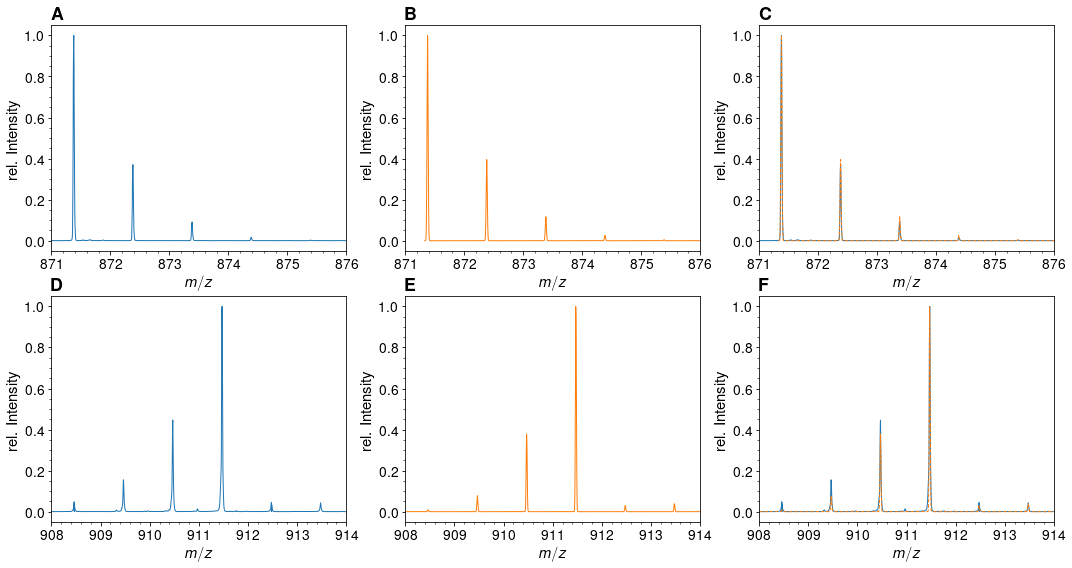

In [4]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os

matplotlib.rc('font', **{'family':'sans-serif',
                         'sans-serif':['Helvetica']})#, 'serif':['Asana']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['mathtext.fontset'] = 'stixsans'
matplotlib.rcParams['text.latex.preamble'] = [
       r'%\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'%\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  

from glob import glob


files = sorted(glob('./data_fig2/*.csv'))
dfs = [pd.read_csv(f) for f in files]
dfs[1].rel_intensity.max()

fig,axs = plt.subplots(ncols=3, nrows=2, figsize=(15,8), facecolor='white')

axs = axs.ravel()
upper_row = list(axs[:3])
lower_row = list(axs[3:])
axs = lower_row + upper_row

heavy = axs[:3]
light = axs[3:]

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

linewidth=1
fontsize_x = 15
fontsize_y = 15
fontsize_ax_title = 18

xlabel = r'$m/z$'
ylabel = r'rel. Intensity'

for ax,df,c in zip(pd.np.hstack([axs[:2],axs[3:-1]]), dfs, ('C0', 'C1')*2):
    ax.plot(df.mz, df.rel_intensity, c=c, linewidth=linewidth)

heavy[-1].plot(dfs[0].mz, dfs[0].rel_intensity, linewidth=linewidth)
heavy[-1].plot(dfs[1].mz, dfs[1].rel_intensity, '--', linewidth=linewidth)

for ax in heavy:
    ax.set_xlim(908, 914)
    ax.set_xlabel(xlabel, fontsize = fontsize_x)
    ax.set_ylabel(ylabel, fontsize = fontsize_y)

light[-1].plot(dfs[2].mz, dfs[2].rel_intensity, linewidth=linewidth)
light[-1].plot(dfs[3].mz, dfs[3].rel_intensity, '--', linewidth=linewidth)

for ax in light:
    ax.set_xlim(871, 876)
    ax.set_xlabel(xlabel, fontsize = fontsize_x)
    ax.set_ylabel(ylabel, fontsize = fontsize_y)

#ax_titles = ['A - GM-Tripeptide uniformly labeled, experiment', 'B - GM-Tripeptide uniformly labeled, simulation', 'C - Overlay',\
#             'A - GM-Tripeptide uniformly labeled, experiment', 'B - GM-Tripeptide uniformly labeled, simulation','C - Overlay'\
#]

ax_titles = [r'\textbf{%s}' % (t) for t in list('DEFABC')]

for a,t in zip(axs, ax_titles):
    a.set_title(t, ha='left', x=0, fontsize = fontsize_ax_title)
    a.minorticks_on()

fig.tight_layout()

plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [5]:
fig.savefig('Figure2_helvetica.png', dpi=300)
fig.savefig('Fig2_helvetica.svg')